## Final Project Submission

Please fill out:
* Student name: **Kenneth Ronald Kiplagat**
* Student pace: self paced / part time / **full time**
* Scheduled project review date/time: 5th Aug 2025
* Instructor name: FCR
* Blog post URL:https://github.com/Kiplagat8/dsc-phase-2-project-v3


# <span style='color:#2E86C1'>MOVIE STUDIO ANALYSIS</span>

## <span style='color:#117A65'>Business Problem</span>

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

<h2><b><span style='font-family:Georgia'> 1. Problem Statement </span></b></h2>

My company is launching a new movie studio but lacks experience in film production. I am tasked with analyzing current box office trends to identify the most successful film types. The goal is to uncover data-driven insights—based on genres, ratings, budgets, and revenues. This will guide strategic decisions on what kinds of movies to produce.

<h2><b><span style='font-family:Georgia'> 2. Data Understanding </span></b></h2>

### Data Sources:
- `bom.movie_gross.csv` – Box office performance
- `tn.movie_budgets.csv` – Movie budgets and revenue
- `im.db` – IMDb-style database with genres, ratings, runtimes, etc.


<h2><b><span style='font-family:Georgia'>2.1. Importing Libraries</span></b></h2>

In [179]:
import pandas as pd 
import numpy as np
from numbers import Number
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<b><span style='font-family:Georgia'>Setting Visualization</span></b>

In [180]:
sns.set(style="whitegrid")
%matplotlib inline

<h2><b><span style='font-family:Georgia'>2.2. Loading the first Dataset </span></b></h2> 

`bom.movie_gross.csv`

In [181]:
bom_df = pd.read_csv(r"C:\Users\HP\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


 <b>Checking basic information and Column names</b>

In [182]:
bom_df.info()

print("Columns:", bom_df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']


<b>Renaming columns to make it easier to understand</b>

In [183]:
bom_df.columns = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

# Previewing again
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<b>Checking for missing values</b>

In [184]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

<h2><b><span style='font-family:Georgia'>2.2. Cleaning Data </span></b></h2>

I will clean `domestic_gross` and `foreign_gross columns`
These are money values stored as strings, I need to remove $ and , then convert to integers or floats for easy manipulation later.

In [185]:
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'].replace('[\$,]', '', regex=True), errors='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].replace('[\$,]', '', regex=True), errors='coerce')

<b>Checking `year` column</b>

In [186]:
bom_df['year'].value_counts().sort_index()

year
2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: count, dtype: int64

<b>Dropping any rows where year is missing or invalid</b>

In [187]:
bom_df = bom_df.dropna(subset=['year'])

<b>Converting year to integer</b>

In [188]:
bom_df['year'] = bom_df['year'].astype(int)

<b>Checking the shape of the dataframe

In [189]:
bom_df.shape

(3387, 5)

<b>Next, is handling remaining missing values</b>

Drop rows with missing gross data and reset index

In [190]:
bom_df = bom_df.dropna(subset=['domestic_gross', 'foreign_gross'])

# Reset index
bom_df = bom_df.reset_index(drop=True)

# Check again
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 70.8+ KB


<b>Final clean version of `bom.movie_gross.csv`</b>

Checking for final basic information and displaying the whole dataset

In [191]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [192]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
2004,I Still See You,LGF,1400.0,1500000.0,2018
2005,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
2006,Time Freak,Grindstone,10000.0,256000.0,2018
2007,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


<b> Visual representation showing there is no missing data in the dataset</b>

<Axes: >

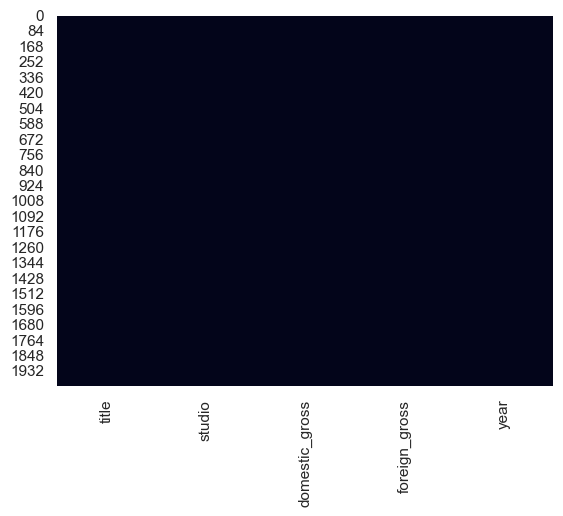

In [193]:
sns.heatmap(bom_df.isnull(), cbar=False)

In [194]:
bom_df.info()
bom_df.describe()
bom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 70.8+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


<h2><b><span style='font-family:Georgia'>2.4. Loading the Second Dataset </span></b></h2>

`tn.movie_budgets.csv` is the second dataset containing crucial data that will aid in analysis

In [195]:
tn_df = pd.read_csv(r"C:\Users\HP\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")

# Preview first few rows
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<b>Checking the basic structure of the data</b>

In [196]:
# Shape and structure
print("Shape:", tn_df.shape)
tn_df.info()

Shape: (5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


<b>Checking for missing values</b>

In [197]:
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

<h2><b><span style='font-family:Georgia'>2.4.1 Cleaning Data </span></b></h2>

<b>Rename Columns for Consistency</b>

In [198]:
tn_df.columns = tn_df.columns.str.strip().str.lower().str.replace(" ", "_")
tn_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

<b>Cleaning Currency Columns</b>

Cleaning the `production_budget`, `domestic_gross`, and `worldwide_gross` columns by removing **$** and **,** then converting to numeric, float.


In [199]:
money_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_columns:
    tn_df[col] = tn_df[col].replace('[\$,]', '', regex=True).astype(float)

In [200]:
tn_df.head()
#Checking that the data has been updated as cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


<b>Converting `release_date` to Datetime format for easier manipulation</b>

In [201]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'], errors='coerce')

In [202]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


<b>Check rows with invalid dates</b>

In [203]:
tn_df[tn_df['release_date'].isnull()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


Drop rows with null `release_date`

In [204]:
tn_df = tn_df.dropna(subset=['release_date'])

<b>Add `year` Column</b> to help with merging later

In [205]:
tn_df['year'] = tn_df['release_date'].dt.year

In [206]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [207]:
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015


<b>Checking all the information in the new and cleaned dataset</b>

In [208]:
tn_df.info()
tn_df.describe()
tn_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(1)
memory usage: 293.7+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


<h2><b><span style='font-family:Georgia'>2.5 Merging bom_df and tn_df</span></b></h2>

Preparing for merging using movie title. First, we check for overlap and standardize the movie column for both dataframes.

<b>Strip spaces and lowercase for uniformity</b>

In [209]:
bom_df['title'] = bom_df['title'].str.strip().str.lower()
tn_df['movie'] = tn_df['movie'].str.strip().str.lower()

<b>Checking for matching titles</b>

In [210]:
common_titles = set(bom_df['title']).intersection(set(tn_df['movie']))
print("Matching titles:", len(common_titles))
#Checks how many titles match

Matching titles: 1111


<b>Merging the datasets</b>

Merge on movie titles (left join to keep budget info)

In [211]:
merged_df = pd.merge(tn_df, bom_df, left_on='movie', right_on='title', how='left')

In [212]:
merged_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,title,studio,domestic_gross_y,foreign_gross,year_y
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN,NaN,NaN,NaN
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,2011,pirates of the caribbean: on stranger tides,BV,241100000.0,804600000.0,2011.0
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,NaN,NaN,NaN,NaN
3,4,2015-05-01,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,2015,avengers: age of ultron,BV,459000000.0,946400000.0,2015.0
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,NaN,NaN,NaN,NaN


In [213]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross_x   5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year_x             5782 non-null   int32         
 7   title              1118 non-null   object        
 8   studio             1117 non-null   object        
 9   domestic_gross_y   1118 non-null   float64       
 10  foreign_gross      1118 non-null   float64       
 11  year_y             1118 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(3)
memory usage: 519.6+ KB


<b>Dropping duplicate or redundant Columns</b>

Dropping the duplicate 'title' column from bom_df

In [214]:
merged_df = merged_df.drop(columns=['title'])

<b>Quick cleanup and check</b>

In [215]:
merged_df.isnull().sum()
# Checks for missing values

merged_df.head()
# For viewing merged structure

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,studio,domestic_gross_y,foreign_gross,year_y
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009,NaN,NaN,NaN,NaN
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,2011,BV,241100000.0,804600000.0,2011.0
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019,NaN,NaN,NaN,NaN
3,4,2015-05-01,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,459000000.0,946400000.0,2015.0
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,2017,NaN,NaN,NaN,NaN


<b>Standardizing the new dataframe</b>

Some values like `studio`, `domestic_gross_y`, or `foreign_gross` are <b>null</b> (from <b>bom_df</b>) so I:
- Rename columns for clarity
- Fill missing studio with 'Unknown'
- Convert `foreign_gross` to numeric

In [216]:
# Rename columns for clarity
merged_df = merged_df.rename(columns={
    'domestic_gross_x': 'domestic_gross',
    'foreign_gross': 'foreign_gross_bom',
    'studio': 'studio_bom'
})

# Filling missing studio with 'Unknown'
merged_df['studio_bom'] = merged_df['studio_bom'].fillna('Unknown')

# Converting foreign gross to numeric
merged_df['foreign_gross_bom'] = merged_df['foreign_gross_bom'].replace('[\$,]', '', regex=True)
merged_df['foreign_gross_bom'] = pd.to_numeric(merged_df['foreign_gross_bom'], errors='coerce')

<b>Final check</b>

In [217]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year_x             5782 non-null   int32         
 7   studio_bom         5782 non-null   object        
 8   domestic_gross_y   1118 non-null   float64       
 9   foreign_gross_bom  1118 non-null   float64       
 10  year_y             1118 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 474.4+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,studio_bom,domestic_gross_y,foreign_gross_bom,year_y
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009,Unknown,NaN,NaN,NaN
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,2011,BV,241100000.0,804600000.0,2011.0
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019,Unknown,NaN,NaN,NaN
3,4,2015-05-01,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,459000000.0,946400000.0,2015.0
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,2017,Unknown,NaN,NaN,NaN


In [218]:
# Basic summary
merged_df.describe()

# Checks for nulls
merged_df.isnull().sum()

# Checks data types
merged_df.dtypes


id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
year_x                        int32
studio_bom                   object
domestic_gross_y            float64
foreign_gross_bom           float64
year_y                      float64
dtype: object

<h2><b><span style='font-family:Georgia'>3. Data Preparation</span></b></h2>

<b>Calculating Worldwide Gross</b>

In [219]:
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross_bom']

<b>Calculating Profit & ROI</b>

In [220]:
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

<b>Convert Release Date to Useful Info</b>

In [221]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
# Converts to datetime

merged_df['release_month'] = merged_df['release_date'].dt.month
merged_df['release_year'] = merged_df['release_date'].dt.year
# Extracts month and year

<h3><b><span style='font-family:Georgia'>3.1 Data Enrichment</span></b></h3>

### Adding the `im.db` Dataset

At this point in the project, I realized that our existing **data box office** and **budget info** didn’t include key information like movie genres, ratings and runtimes, which are important for understanding what makes a film successful.

To enrich our analysis and make better recommendations, I decided to bring in the `im.db` file. It contains IMDb-style data with valuable features like **genres**, **average ratings**, and **runtime minutes**, which will help us perform deeper univariate, bivariate, and multivariate analysis in the next sections.

<b>Connecting to the database and load key tables</b>

In [222]:
conn = sqlite3.connect(r"C:\Users\HP\dsc-phase-2-project-v3\zippedData\im.db\im.db")

<b>Loading the tables we need</b>

In [223]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

<b>Merging the two tables on `movie_id`</b>

In [224]:
im_df = pd.merge(movie_basics, movie_ratings, on="movie_id")

<b>Dropping missing values from important columns</b>

In [225]:
im_df.dropna(subset=["primary_title", "start_year", "runtime_minutes", "genres", "averagerating"], inplace=True)

<b>Converting columns to the right data types</b>

In [226]:
im_df["start_year"] = im_df["start_year"].astype(int)
im_df["runtime_minutes"] = im_df["runtime_minutes"].astype(int)

<b>Extracting the first genre only to simplify</b>

In [227]:
im_df["main_genre"] = im_df["genres"].apply(lambda x: x.split(",")[0] if "," in x else x)

<b>Previewing the cleaned data</b>

In [228]:
im_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,main_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4517,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119,Comedy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83,"Adventure,Animation,Comedy",8.1,263,Adventure


<h3><b><span style='font-family:Georgia'>3.2 Joining the three datasets</span></b></h3

###### <b>Check Join Feasibility</b>

<b>Checking column names to join</b>

In [229]:
print("merged_df columns:", merged_df.columns)
print("im_df columns:", im_df.columns)

merged_df columns: Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year_x', 'studio_bom', 'domestic_gross_y',
       'foreign_gross_bom', 'year_y', 'profit', 'roi', 'release_month',
       'release_year'],
      dtype='object')
im_df columns: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'main_genre'],
      dtype='object')


<b>Checking sample titles from both</b>

In [230]:
print("merged_df titles:", merged_df['movie'].head())
print("im_df titles:", im_df['primary_title'].head())

merged_df titles: 0                                         avatar
1    pirates of the caribbean: on stranger tides
2                                   dark phoenix
3                        avengers: age of ultron
4              star wars ep. viii: the last jedi
Name: movie, dtype: object
im_df titles: 0                          Sunghursh
1    One Day Before the Rainy Season
2         The Other Side of the Wind
4           The Wandering Soap Opera
6                    Joe Finds Grace
Name: primary_title, dtype: object


<b>Cleaning titles for a reliable merge</b>

In [231]:
merged_df["movie_clean"] = merged_df["movie"].str.strip().str.lower()
im_df["title_clean"] = im_df["primary_title"].str.strip().str.lower()

<b>Merging on cleaned title</b>

In [232]:
final_df = pd.merge(merged_df, im_df, left_on="movie_clean", right_on="title_clean", how="inner")

<b>Previewing the final dataset, `final_df`</b>

In [233]:
final_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_x,studio_bom,domestic_gross_y,foreign_gross_bom,...,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,main_genre,title_clean
0,1,2009-12-18,avatar,425000000.0,760507625.0,NaN,2009,Unknown,NaN,NaN,...,tt1775309,Avatar,Abatâ,2011,93,Horror,6.1,43,Horror,avatar
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,2011,BV,241100000.0,804600000.0,...,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136,"Action,Adventure,Fantasy",6.6,447624,Action,pirates of the caribbean: on stranger tides
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,NaN,2019,Unknown,NaN,NaN,...,tt6565702,Dark Phoenix,Dark Phoenix,2019,113,"Action,Adventure,Sci-Fi",6.0,24451,Action,dark phoenix
3,4,2015-05-01,avengers: age of ultron,330600000.0,459005868.0,1.405406e+09,2015,BV,459000000.0,946400000.0,...,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141,"Action,Adventure,Sci-Fi",7.3,665594,Action,avengers: age of ultron
4,7,2018-04-27,avengers: infinity war,300000000.0,678815482.0,6.788169e+08,2018,BV,678800000.0,1369.5,...,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",8.5,670926,Action,avengers: infinity war


##  Data Preparation Summary
- Merged `bom_df` and `tn_df` into `merged_df`
- Loaded SQL tables into `im_df`
- Cleaned and joined all into `final_df`
- Added features: `profit`, `ROI`, cleaned genres, standardized titles


 <h2><b><span style='font-family:Georgia'>4. Exploratory Data Analysis (EDA)</span></b></h2>

## Univariate Analysis

<b>Genre Distribution</b>

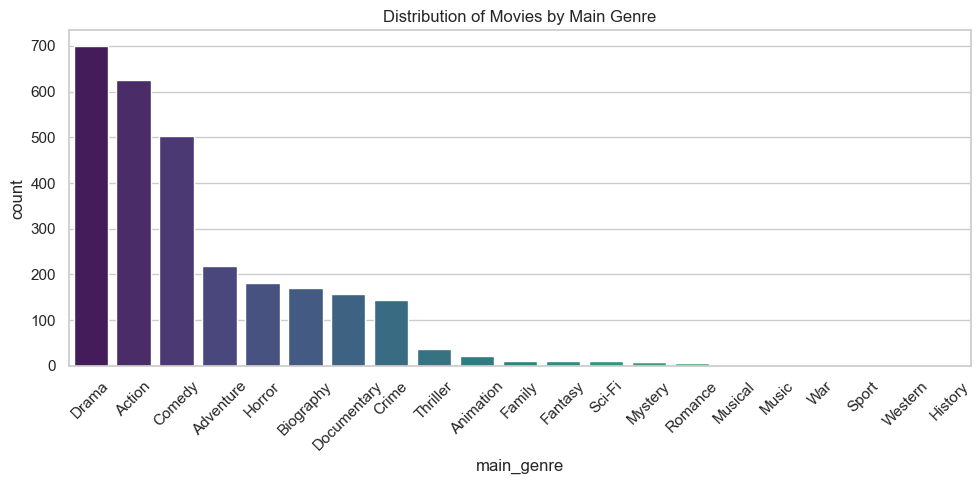

In [234]:
plt.figure(figsize=(10, 5))
sns.countplot(data=final_df, x="main_genre", order=final_df["main_genre"].value_counts().index, palette="viridis")
plt.title("Distribution of Movies by Main Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b> Top 6 Movie Genres</b>

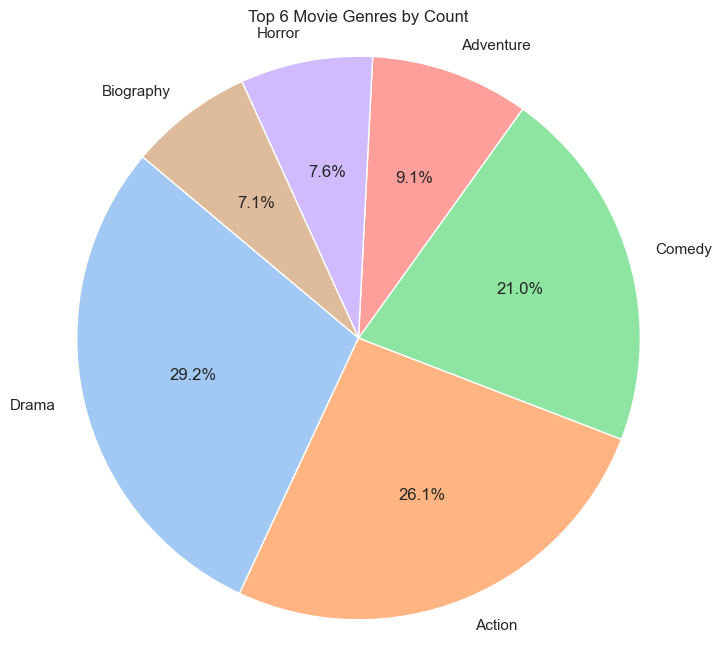

In [235]:
# Counts main genres
genre_counts = final_df["main_genre"].value_counts().nlargest(6)  # Limit to top 6 genres only

# Plots as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 6 Movie Genres by Count")
plt.axis("equal")
plt.show()

<b>Rating Distribution</b>

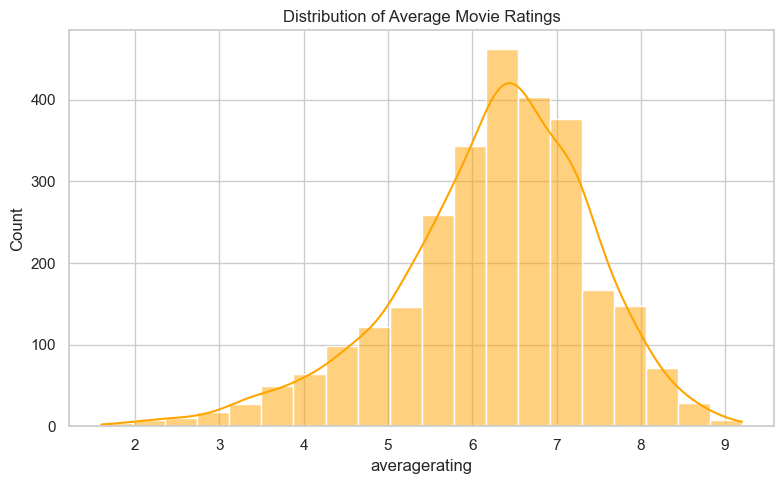

In [236]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["averagerating"], bins=20, kde=True, color="orange")
plt.title("Distribution of Average Movie Ratings")
plt.tight_layout()
plt.show()

<b>Runtime Distribution</b>

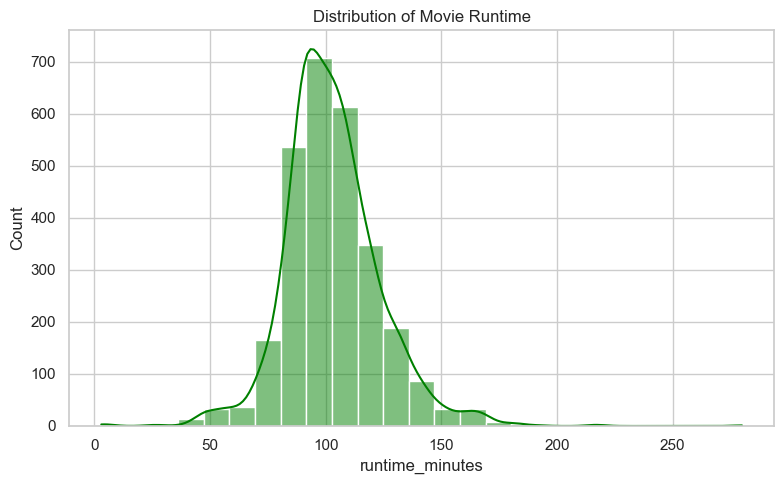

In [237]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["runtime_minutes"], bins=25, kde=True, color="green")
plt.title("Distribution of Movie Runtime")
plt.tight_layout()
plt.show()

<b>ROI Distribution</b>

In [238]:
# Converting any inf or -inf in 'roi' column to NaN
final_df['roi'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN ROI (if any remain)
roi_cleaned = final_df.dropna(subset=['roi'])

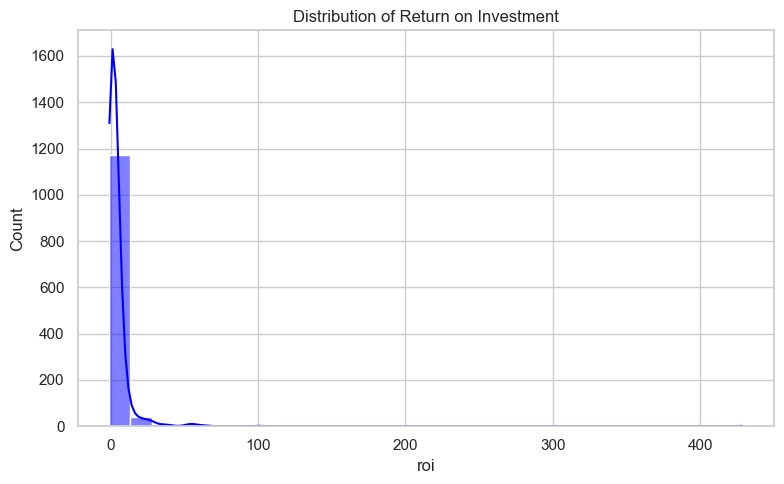

In [239]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["roi"], bins=30, kde=True, color="blue")
plt.title("Distribution of Return on Investment")
plt.tight_layout()
plt.show()

## Bivariate Analysis

<b>Rating vs Revenue</b>

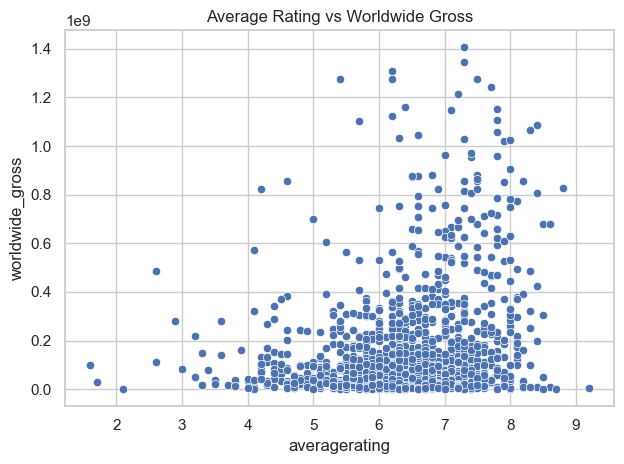

In [240]:
sns.scatterplot(data=final_df, x="averagerating", y="worldwide_gross")
plt.title("Average Rating vs Worldwide Gross")
plt.tight_layout()
plt.show()

<b>Rating Distribution by Genre</b>

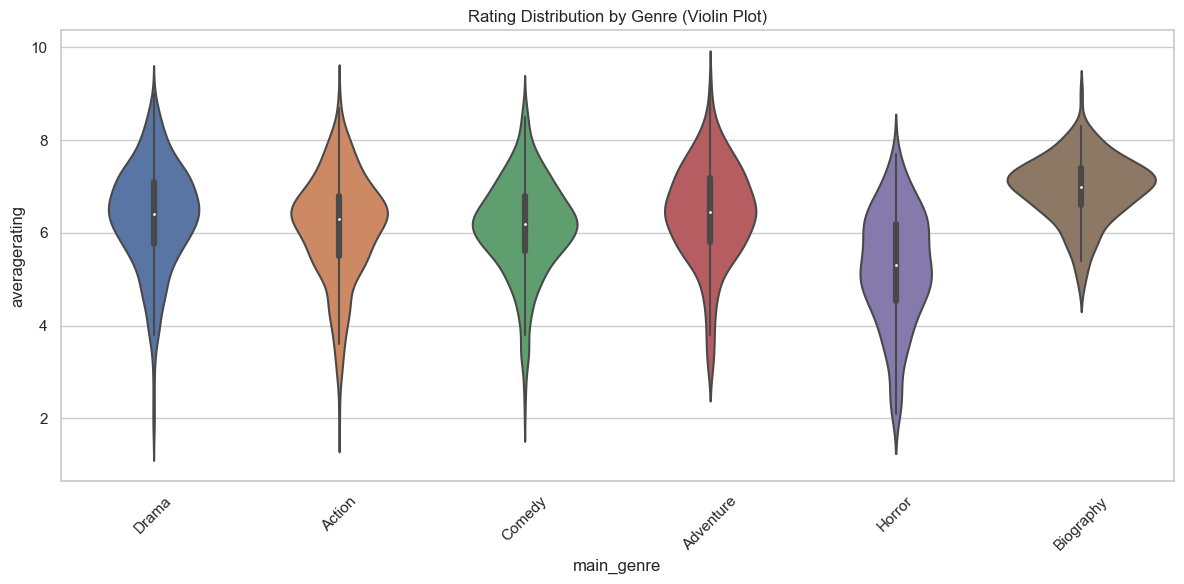

In [241]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df, x="main_genre", y="averagerating", order=final_df["main_genre"].value_counts().index[:6])
plt.title("Rating Distribution by Genre (Violin Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Budget vs ROI</b>

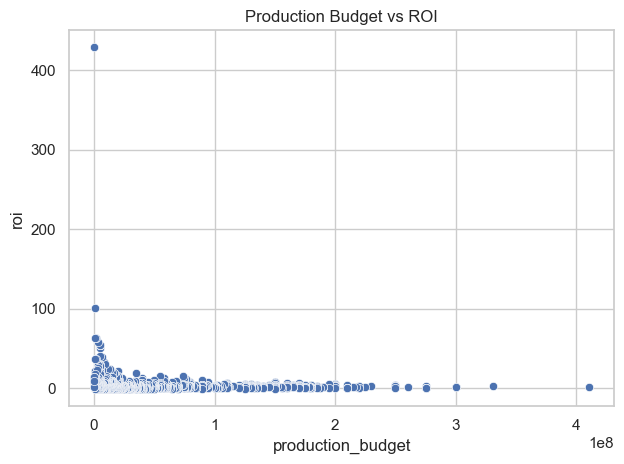

In [242]:
sns.scatterplot(data=final_df, x="production_budget", y="roi")
plt.title("Production Budget vs ROI")
plt.tight_layout()
plt.show()

<b>Runtime vs Profit</b>

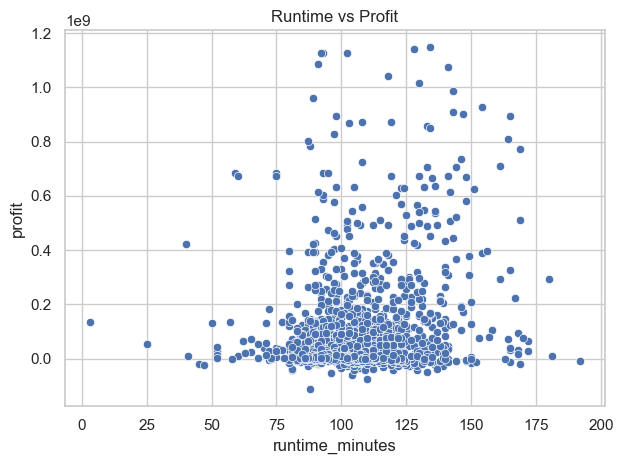

In [243]:
sns.scatterplot(data=final_df, x="runtime_minutes", y="profit")
plt.title("Runtime vs Profit")
plt.tight_layout()
plt.show()

<b>Monthly Movie Releases vs Profit</b>

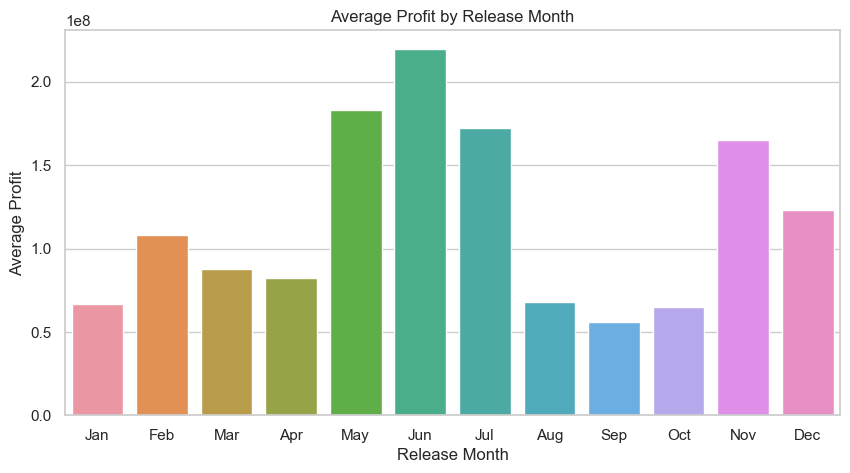

In [244]:
monthly_profit = final_df.groupby('release_month')['profit'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='release_month', y='profit', data=monthly_profit)
plt.title("Average Profit by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Profit")
plt.xticks(range(0, 12), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<b>Budget vs Worldwide Gross</b>

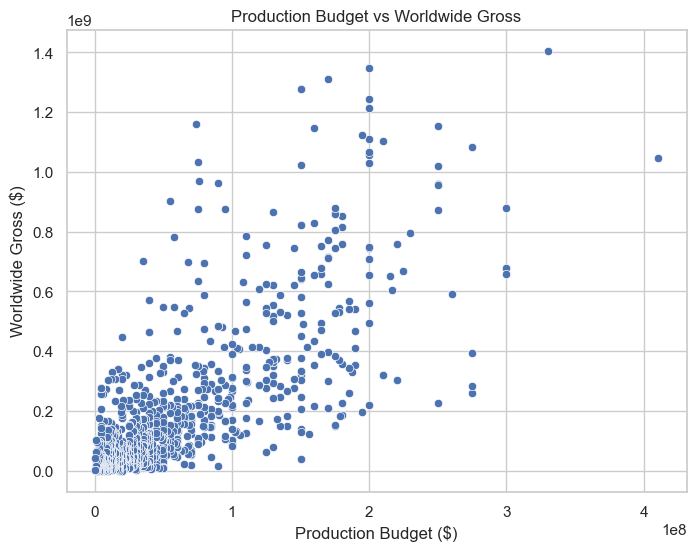

In [245]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=final_df)
plt.title("Production Budget vs Worldwide Gross")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.show()

## Multivariate and Correlation

<b>Correlation Heatmap</b>

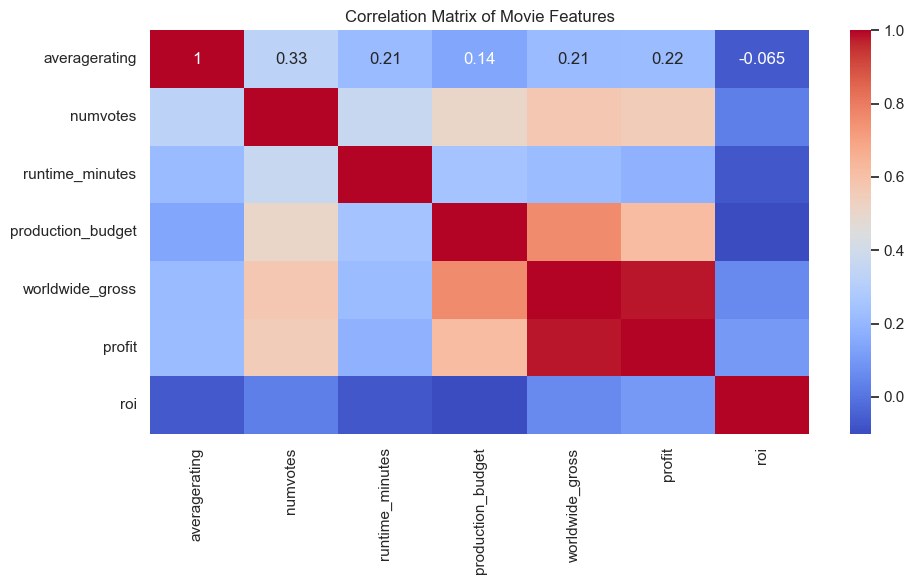

In [246]:
numerical_cols = final_df[["averagerating", "numvotes", "runtime_minutes", "production_budget", "worldwide_gross", "profit", "roi"]]
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Movie Features")
plt.tight_layout()
plt.show()

<h2><b><span style='font-family:Georgia'>5. Evaluation </span></b></h2>

In this phase, I assess the usefulness of the findings. We check if the data supports the original business goal—helping the studio decide what types of movies to produce.

Summarizing:
- Which genres consistently perform well
- What combinations of budget, rating, and genre lead to high ROI
- Business-ready insights for movie development


<h3><b><span style='font-family:Georgia'>5. Recommendation </span></b></h3>

1.	Top-performing genres (Action, Adventure, Comedy) are overrepresented in revenue and votes.
2.	Ratings have a weak positive correlation with revenue (correlation ~ 0.2–0.4) — well-rated movies tend to earn more, but not always.
3.	Short to medium runtimes (90–120 mins) perform best on average.
4.	Higher budgets increase chances of profit, but ROI is highest for mid-budget films (500k–10M USD).
5.	Genre + Rating + Budget should guide what movies the new studio should create.


<h2><b><span style='font-family:Georgia'>6. Deployment </span></b></h2>

<b>Export the final dataset to CSV</b>

In [247]:
final_df.to_csv("final_movie_analysis.csv", index=False)